# Emotion Mining / Sentimental Analysis of a Product reviews from Flipkart Website 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


In [2]:
#Web Scraping a Washing Machine Reviews data from Flipkart's website
cust_names=[]
cust_reviews=[]

page_num= input("Enter number of pages") #here enter number of pages as 70
for i in range(1,int(page_num)+1):
   link="https://www.flipkart.com/ifb-6-kg-5-star-2x-power-steam-hard-water-wash-fully-automatic-front-load-in-built-heater-white/product-reviews/itm3bf21ef8dc5e7?pid=WMNGDMYHAKGZHEPK&lid=LSTWMNGDMYHAKGZHEPKZXNDIY&aid=overall&certifiedBuyer=false&sortOrder=MOST_RECENT&page="+str(i)
   req=requests.get(link)
   content=BeautifulSoup(req.content,'html.parser')
   #reviews=content.find_all("div",class_="row")
   #reviews=content.find_all('span',class_="_1H-bmy")
   names=content.find_all('p',class_="_2sc7ZR _2V5EHH")
   reviews=content.find_all(class_="t-ZTKy")
   
   for i in names:
      cust_names.append(i.text)
   for i in reviews:
      cust_reviews.append(i.text)


In [3]:
#Printing customer names
for i in cust_names:
    print(i)

Tapas Datta
Flipkart Customer
Sayantan Chakraborty
Sunny  lalwani
Pushkar Kumar Tyagi
Flipkart Customer
MALLIDI SRINIVASA  REDDY
Vaddadhi Karthik
RISHAD MOOTHEDATH
Kula Sekhar
Prathap G S
KARRAVULA AJAY KUMAR
Ganja  Sarfaraj
Manish Gupta
Flipkart Customer
Flipkart Customer
Aishwarya  Durgabhavani
Flipkart Customer
Sushil Kumar
Abhishek Tomar
Ashwin Kumar 
Customer
Siva
Flipkart Customer
Tarunbhai manubhai Baldaniya
Md Ejaz  Ahmed
Flipkart Customer
Satish  Bansode
Mohan Burle
Rony Bhai
ANANTHANARAYANAN  P R
Gourav Kumar
Flipkart Customer
Amit Kumar
SURESH KUDAKA
Hemadri Atthuru
Sangram Chandgude
Venkateshwaralu Gopi
NAVEEN REDDY VEERABHADRA
Flipkart Customer
Vinod  kumar Gupta 
Prabhu Veer Kallem
Santhosh
vijay prakash
Sreejith Sudarshanan
Flipkart Customer
Vinayak Tallalli
Veeraraghavan S
Flipkart Customer
shubham  kumar 
Jishnu Ramesan
parimal nandaniya
Flipkart Customer
Bharathi CB
DHIRENDRA  KUMAR
Bhuvan  Kumar 
pendam harishankar
Flipkart Customer
Onkar Deshpande
Saicharan  Kothapa

In [4]:
#Printing Customer Reviews
for i in cust_reviews:
    print(i)

Quality is good enough.READ MORE
NiceREAD MORE
Fully satisfied with this brand new item 🤩READ MORE
Should not buy this IFB technology any product because after some time, this company electronic product spread electric current around it i.e. give electric shock.READ MORE
GoodREAD MORE
SimpleREAD MORE
Value  for moneyREAD MORE
Awesome thanks FlipkartREAD MORE
GoodREAD MORE
After using 2months is not working so many times errors worst,, don't buy this item every oneREAD MORE
Nice.READ MORE
ExcellentREAD MORE
Wash clothes are perfect Clean,Voice and vibration is too lowREAD MORE
In this budget nice Product 😀READ MORE
It's goodREAD MORE
Best at this price range. Using since 3 yrs no issues till now. Cons:A bit noisy.Takes 1hr 45 mins to 2 hrs for a cycle in cotton wash method.READ MORE
Nice product. Good working.clothes r very clean.READ MORE
Product is comparatively good than other company it's heavy which gives benifits during spin and washing. it's good @ 19700 good for small family 6kg

In [5]:
#Storing customer data in excel workbook manually and retriving data from that excelsheet
rev=pd.read_excel("C:/Users/Hi/Desktop/VS_Code_conda/ML Assignments1/NLP/reviews.xlsx")
rev=rev.drop(rev.iloc[:,2:],axis=1)
rev

,cust_names,cust_reviews
0,Tapas Datta,Quality is good enough.READ MORE
1,Flipkart Customer,NiceREAD MORE
2,Sayantan Chakraborty,Fully satisfied with this brand new item ??REA...
3,Sunny lalwani,Should not buy this IFB technology any product...
4,Pushkar Kumar Tyagi,GoodREAD MORE
...,...,...
625,Atul Gore,niceREAD MORE
626,Umesh Chandgude,Thank you so much filpcardREAD MORE
627,akash tarale,"Nice product in good price,value for your mone..."
628,Sandeep Sabale,Super duper hit product with best rateREAD MORE


In [6]:
#dropping NA values 
rev=rev.dropna()
rev

,cust_names,cust_reviews
0,Tapas Datta,Quality is good enough.READ MORE
1,Flipkart Customer,NiceREAD MORE
2,Sayantan Chakraborty,Fully satisfied with this brand new item ??REA...
3,Sunny lalwani,Should not buy this IFB technology any product...
4,Pushkar Kumar Tyagi,GoodREAD MORE
...,...,...
625,Atul Gore,niceREAD MORE
626,Umesh Chandgude,Thank you so much filpcardREAD MORE
627,akash tarale,"Nice product in good price,value for your mone..."
628,Sandeep Sabale,Super duper hit product with best rateREAD MORE


In [7]:
#dropping cust names to preserve the privacy of the people
rev=rev.drop(rev.iloc[:,:1],axis=1)
rev

,cust_reviews
0,Quality is good enough.READ MORE
1,NiceREAD MORE
2,Fully satisfied with this brand new item ??REA...
3,Should not buy this IFB technology any product...
4,GoodREAD MORE
...,...
625,niceREAD MORE
626,Thank you so much filpcardREAD MORE
627,"Nice product in good price,value for your mone..."
628,Super duper hit product with best rateREAD MORE


# Data Cleaning

In [8]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('read more',' ',text)
    return text

clean = lambda x: clean_text(x)

In [9]:
rev['cust_reviews'] = rev.cust_reviews.apply(clean)
rev

,cust_reviews
0,quality is good enough
1,nice
2,fully satisfied with this brand new item
3,should not buy this ifb technology any product...
4,good
...,...
625,nice
626,thank you so much filpcard
627,nice product in good pricevalue for your money...
628,super duper hit product with best rate


In [10]:
from wordcloud import WordCloud, STOPWORDS
import spacy
import matplotlib.pyplot as plt


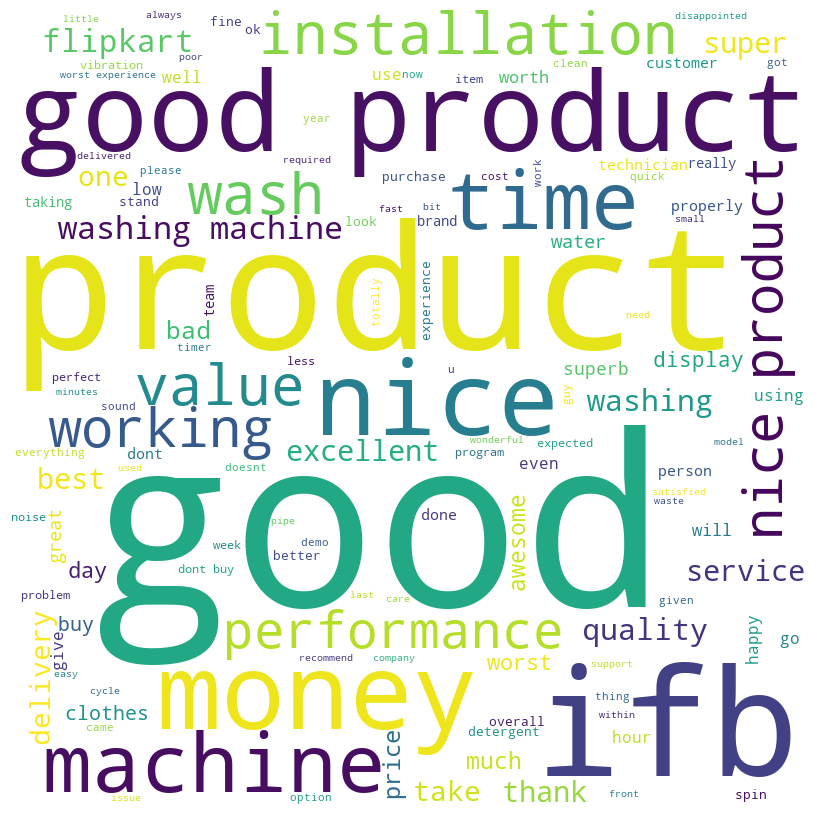

In [11]:
#Creating Word Cloud which will show the Words frequently used will be in big Sixe and words with less frequency are small in size 
comment_words = ''
stopwords = set(STOPWORDS)
# iterate through the csv file
for val in rev.cust_reviews  :
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [12]:
#Parts Of Speech Tagging
nlp= spacy.load('en_core_web_sm')
one_block=rev.cust_reviews[70]
one_block
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [13]:
for token in doc_block:
    print(token,token.pos_)

good ADJ
machine NOUN
purchased VERB
with ADP
free ADJ
mind NOUN
because SCONJ
   SPACE
year NOUN
full ADJ
machine NOUN
waranty NOUN


In [14]:
#Filtering for nouns and verbs only
noun_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN' , 'VERB')]
print(noun_verbs)

['machine', 'purchased', 'mind', 'year', 'machine', 'waranty']


In [15]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X= cv.fit_transform(noun_verbs)
sum_words= X.sum(axis=0)
word_freq=[(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
word_freq= sorted(word_freq, key=lambda x: x[1], reverse= True)
wf_df=pd.DataFrame(word_freq)
wf_df.columns= ['word','count']
wf_df

,word,count
0,machine,2
1,purchased,1
2,mind,1
3,year,1
4,waranty,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

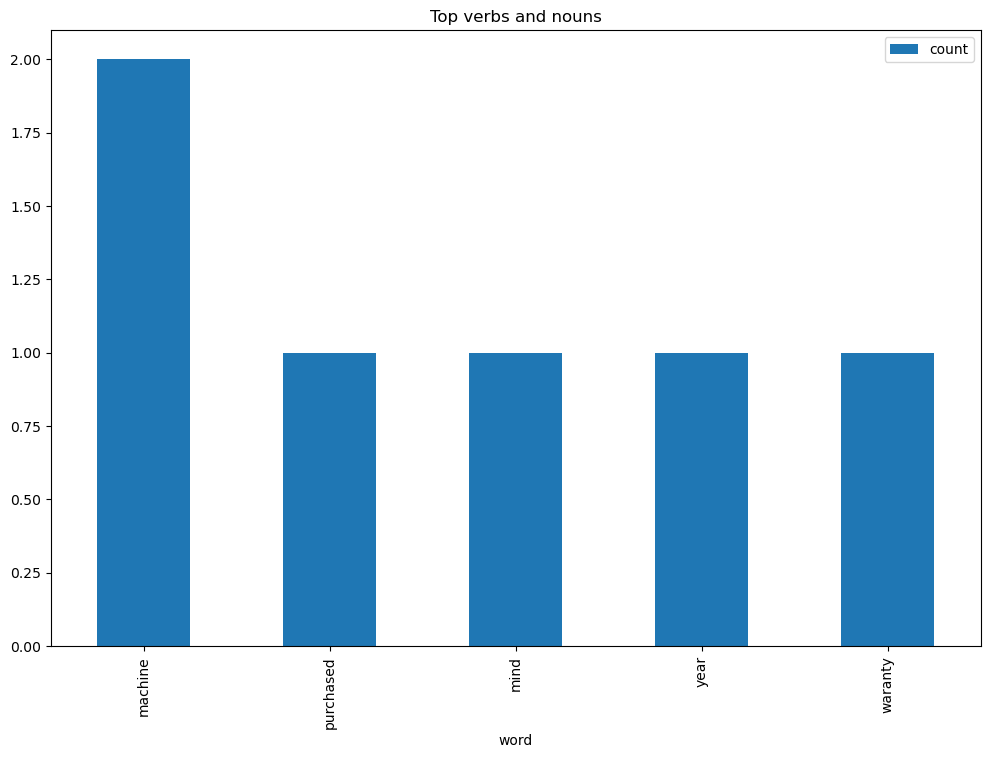

In [16]:
##Visualizing results
#Barchart for  nouns + verbs of a sentence
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

# Sentimental Analysis

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
#importing affin csv in which there are scores for words giving by well known psychiatrists
afinn=pd.read_csv('C:\\Users\\Hi\\Desktop\\Python Datasets\\Afinn.csv',sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [19]:
rev=[cust_reviews.strip() for cust_reviews in rev.cust_reviews]  # remove both the leading and the trailing characters
rev=[cust_reviews for cust_reviews in rev if cust_reviews] # removes empty strings, because they are considered in Python as False
rev

['quality is good enough',
 'nice',
 'fully satisfied with this brand new item',
 'should not buy this ifb technology any product because after some time this company electronic product spread electric current around it ie give electric shock',
 'good',
 'simple',
 'value  for money',
 'awesome thanks flipkart',
 'good',
 'after using   is not working so many times errors worst dont buy this item every one',
 'nice',
 'excellent',
 'wash clothes are perfect cleanvoice and vibration is too low',
 'in this budget nice product',
 'its good',
 'best at this price range using since   yrs no issues till now consa bit noisytakes     mins to   hrs for a cycle in cotton wash method',
 'nice product good workingclothes r very clean',
 'product is comparatively good than other company its heavy which gives benifits during spin and washing its good    good for small family   is sufficient',
 'good product got for   in big billion day steam wash all good and value for money',
 'excellent',
 'good',

In [20]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(', '.join(rev))

In [21]:
rev_df=pd.DataFrame(rev, columns=['sentences'])
rev_df

,sentences
0,quality is good enough
1,nice
2,fully satisfied with this brand new item
3,should not buy this ifb technology any product...
4,good
...,...
624,nice
625,thank you so much filpcard
626,nice product in good pricevalue for your money...
627,super duper hit product with best rate


In [22]:
affinity_scores= afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [23]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment (text: str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [24]:
# test that it works
calculate_sentiment(text='good')

3

In [25]:
rev_df['sentiment_value']=rev_df['sentences'].apply(calculate_sentiment)

In [26]:
 #how many words are in the sentence?
rev_df['word_count']=rev_df['sentences'].str.split().apply(len)
rev_df['word_count']

0       4
1       1
2       7
3      25
4       1
       ..
624     1
625     5
626    11
627     7
628     5
Name: word_count, Length: 629, dtype: int64

In [27]:
rev_df.sort_values(by='sentiment_value',ascending=False)


,sentences,sentiment_value,word_count
191,very good product and very low noice we loved ...,14,30
485,awesome product from flip kart and ifb good de...,14,20
496,its an awesome washing machine tough durablego...,13,40
404,good and clean wash good perfornance only thin...,11,18
448,liked the product very much and overall experi...,11,41
...,...,...,...
194,error problem very bad,-7,4
541,product was too bad and worst service from fli...,-8,26
312,machine performance is too bad every technic...,-8,13
32,worst experience with ifb washing machine fr...,-10,50


In [28]:
# Sentiment score of the whole review
rev_df['sentiment_value'].describe()

count    629.000000
mean       2.612083
std        3.042519
min      -12.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       14.000000
Name: sentiment_value, dtype: float64

In [29]:
rev_df[rev_df['sentiment_value']<0]

,sentences,sentiment_value,word_count
3,should not buy this ifb technology any product...,-2,25
9,after using is not working so many times err...,-5,16
26,the worst service ever first of all if u r tak...,-3,96
32,worst experience with ifb washing machine fr...,-10,50
33,washing time has neither mentioned on flipkart...,-1,32
...,...,...,...
606,installstion person worst explained and not f...,-3,8
609,dont buy thistaking lot of timeno display we ...,-3,43
610,product is value for money but a little noisy ...,-7,20
619,damaged item,-3,2


In [30]:
rev_df[rev_df['sentiment_value']>0]

,sentences,sentiment_value,word_count
0,quality is good enough,3,4
1,nice,3,1
2,fully satisfied with this brand new item,2,7
4,good,3,1
7,awesome thanks flipkart,6,3
...,...,...,...
624,nice,3,1
625,thank you so much filpcard,2,5
626,nice product in good pricevalue for your money...,6,11
627,super duper hit product with best rate,6,7


C:\Users\Hi\AppData\Local\Temp\ipykernel_6408\3616403883.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rev_df['sentiment_value'])


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

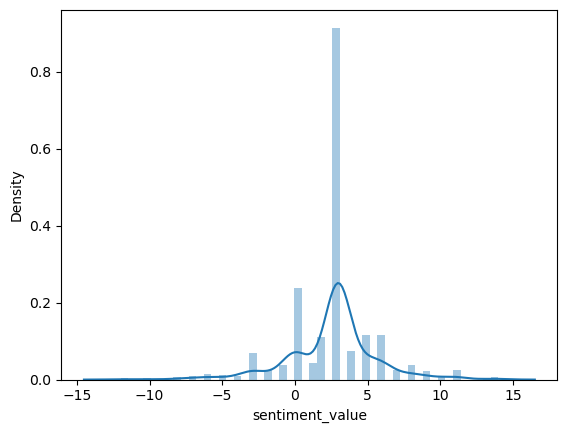

In [31]:
import seaborn as sns
sns.distplot(rev_df['sentiment_value'])
#From this distplot we can see that there is  positive overall review and most of the reviews are positive as the bar is high in between 0 to 5 where 0 indicates neutral

In [32]:
rev_df['sentiment_value'].sum(axis=0)

1643

In [33]:
rev_df['index']=range(0,len(rev_df))

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

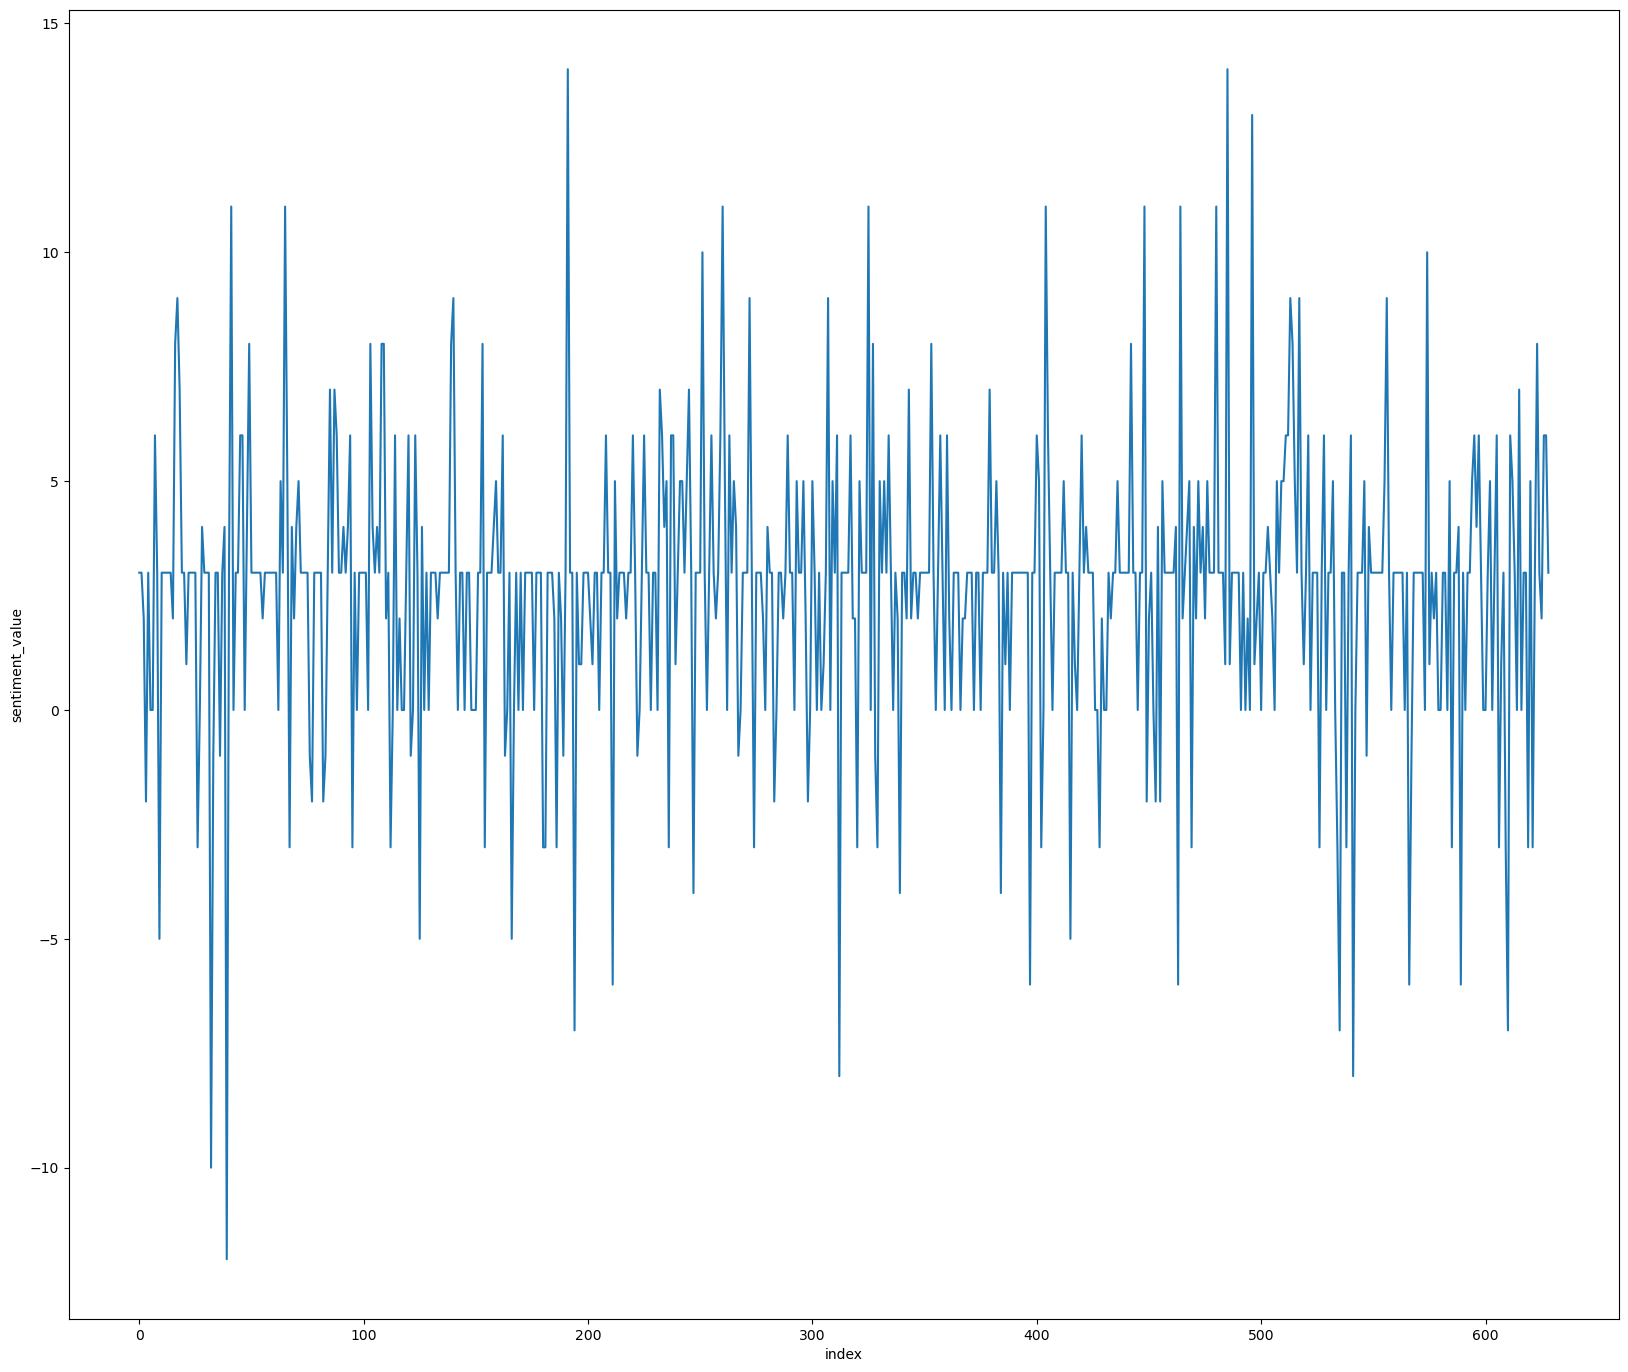

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,17))
sns.lineplot(y='sentiment_value', x='index',data=rev_df)